# COMP3222/6246 Machine Learning Technologies (2022/23)
# Lab 5 – Perceptrons, Deep Net, and Convolutional Neural Net

In this lab, we introduce how to implement a perceptron, a deep neural network and also a convolutional neural network (DNN). Though it is not a good practise, we use all the data to train and test our model for the purpose of demonstration. We also present you with a code that is working, but yields poor results. We expect you to spot these issues and improve the code. Exercises are also provided at the end of each section to improve your technical skill.

## Setup

_Make sure that the following code is executed before every other sections of this lab_

In [4]:
# To support both python 2 and 3
from __future__ import division, print_function, unicode_literals

# Common imports
import os
import numpy as np

# These two lines are required to use Tensorflow 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# To plot nice figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Clear tensorflow's and reset seed
def reset_graph(seed=None):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

Instructions for updating:
non-resource variables are not supported in the long term


## A Perceptron

In this section, we will use an artificial neuron (aka _perceptron_) to perform binary classification on linearly separable data. Specifically, we will use a portion of the Iris dataset; the description of this dataset can be found at <a href="http://scikit-learn.org/stable/datasets/index.html#iris-dataset">http://scikit-learn.org/stable/datasets/index.html#iris-dataset</a>.

/var/folders/5s/ph73x81x4cl5c6f4k6k6t_th0000gn/T/ipykernel_90938/2922625383.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # classify them as either setosa or not setosa


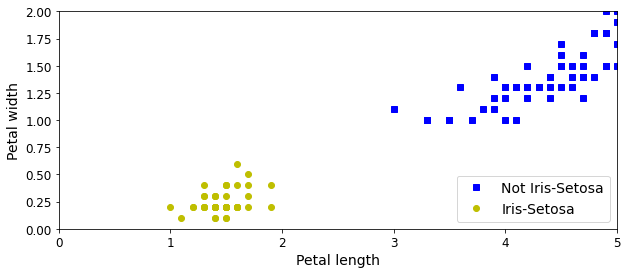

In [15]:
from sklearn.datasets import load_iris

# get dataset
iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # classify them as either setosa or not setosa

# visualise the data
axes = [0, 5, 0, 2]
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

Clearly, this task can be easily done by using a linear classifier. Could you visualise the linear decision boundary on the figure above? Where should it be?

Now, let's move on to implementing a perceptron by using Scikit-learn.

In [16]:
from sklearn.linear_model import Perceptron

# initialise and train a perceptron
pct = Perceptron(max_iter=100, random_state=None)
pct.fit(X, y)

Perceptron(max_iter=100, random_state=None)

Notice that there are many parameters that you can tweak later on. You can have a look at the description of each parameter in the Scikit-Learn's documentation <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html">http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html</a>

Next, we will extract the decision boundary from the model. Below we show a general way of extracting a decision boundary with any model. Note that it can be very computationally expensive if the feature space is large.

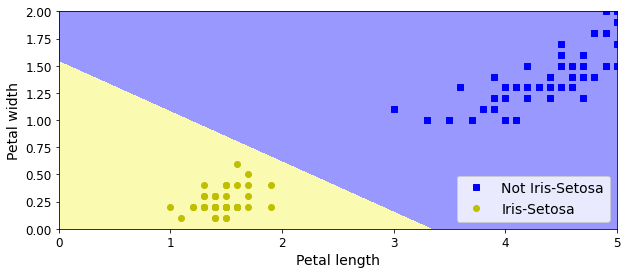

In [17]:
# sampling and predict the whole space of features
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 3000).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 3000).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = pct.predict(X_new)
zz = y_predict.reshape(x0.shape)

# plot the datapoints again
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

# get a nice color
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# plot the predicted samples of feature space
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

**_Exercise 1_**
1. The decision boundary of a single perceptron is a single straight line, but the above plot shows differently! Fix this plot. (_Hint_: you need to sample the feature space more)
2. Try running the code in [3] and [4] multiple times; two snippets above where a network is initialised, trained, and plotted. Do you always get the same decision boundary? Why?
3. A single perceptron is not different from a linear classifier, which can be described by a straight line equation. Retrieve the formula for it. Verify that this is correct by comparing it with the plot above. (_Hint_: have a look in the list of attribute on the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html">online documentation</a>)

2. Stochastic Gradient Descent to train the perceptron and random seed is not fixed
3. a perceptron multiplies each feature with weight (some value), sum them up including the bias (or the intercept), then passes to heaviside function (as specified below). Therefore, the formula can be defined accordingly as a sum of weighted inputs plus bias equating to zero. Now, you need to recover the weights from the trained perceptron; coef and intercept. Then with linear algebra, you will get a straight line equation that you need to confirm with your plot.

## Activation Functions

There are many activation functions that can be used in a perceptron. Different functions result in different behaviours, and consequently different pros & cons. Though we will not go into details, it is beneficial for you to know some popular activation functions.

$$ \text{heaviside} (z) = \begin{cases} 1 & \quad \text{if } z >= 0 \\ 0 & \quad \text{otherwise} \end{cases} $$

$$ \text{logit} (z) = \frac{1}{1 + e^{-z}} $$

$$ \text{relu} (z) = \max{\left( 0 , z \right)} $$

$$ \text{leaky_relu} (z, \alpha) = \max{\left( \alpha z , z \right)} $$

$$ \text{elu} (z, \alpha) = \begin{cases} \alpha \left( e^z - 1 \right) & \quad \text{if } z < 0 \\ z & \quad \text{otherwise} \end{cases} $$

**_Exercise 2_** 
Complete the cell below with the code for the activation functions listed (see equations). Note that they must be able to process NumPy arrays as well.

In [18]:
def heaviside(z): # modify this function. Hint: Use astype(z.dtype)
    return (z >= 0).astype(z.dtype)

def logit(z): # modify this function. Hint: Use np.exp()
    return 1 / (1 + np.exp(-z))

def relu(z): # modify this function. Hint: Use np.maximum()
    return np.maximum(0,z)

def leaky_relu(z, alpha): # modify this function and set default alpha to 0.01
    return np.maximum(alpha*z,z)

def elu(z, alpha=1): # No need to modify this function!
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, # No need to modify this function!
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

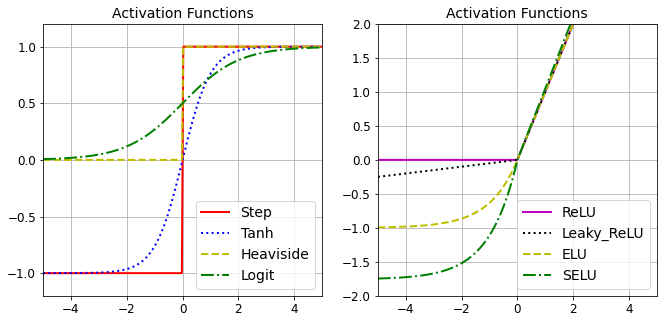

In [19]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,11))

plt.subplot(221)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, np.tanh(z), "b:", linewidth=2, label="Tanh")
plt.plot(z, heaviside(z), "y--", linewidth=2, label="Heaviside")
plt.plot(z, logit(z), "g-.", linewidth=2, label="Logit")
plt.grid(True)
plt.legend(loc="lower right", fontsize=14)
plt.title("Activation Functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(222)
plt.plot(z, relu(z), "m-", linewidth=2, label="ReLU")
plt.plot(z, leaky_relu(z, 0.05), "k:", linewidth=2, label="Leaky_ReLU")
plt.plot(z, elu(z), "y--", linewidth=2, label="ELU")
plt.plot(z, selu(z), "g-.", linewidth=2, label="SELU")
plt.grid(True)
plt.legend(loc="lower right", fontsize=14)
plt.title("Activation Functions", fontsize=14)
plt.axis([-5, 5, -2, 2])

plt.show()

You should be able to see the following characteristics from the graph:
- Step function and Heaviside function are quite similar except for their output ranges.
- Similarly, the hyperbolic tangent and the logit/sigmoidal function are nearly the same except for their output ranges.
- Lastly, all variants of ReLU functions behave differently only when the input sum of a perceptron is lower than zero.

Note that different functions have different sensitivity to the perceptron input.

## Multi-Layer Perceptron (MLP) with Scikit-Learn

In this section, we introduce how to implement multilayer perceptron (MLP) with Scikit-learn. Note that Scikit-learn's MLP is not suitable for very large neural networks.

In [20]:
from sklearn.datasets import load_iris

# get dataset if you haven't
iris = load_iris()
X = iris.data[:, (2, 3)]  # use only petal length and petal width
y = (iris.target == 0).astype(np.int) # classify them as either setosa or not setosa

/var/folders/5s/ph73x81x4cl5c6f4k6k6t_th0000gn/T/ipykernel_90938/2923943317.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # classify them as either setosa or not setosa


In [46]:
from sklearn.neural_network import MLPClassifier

# Initialise a multi-layer perceptron
mlp = MLPClassifier(solver='sgd',max_iter=1, learning_rate_init=0.05, random_state=None, warm_start=True)
mlp

MLPClassifier(learning_rate_init=0.05, max_iter=1, solver='sgd',
              warm_start=True)

Note the MLP's parameters that you can play with. For a description of each parameter, have a look at the online documentation: <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html.</a>

Now, we will show what the decision boundary looks like and how it changes after each training epoch. _(Note that you must generate a new MLP every time before you run the code below)_

/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


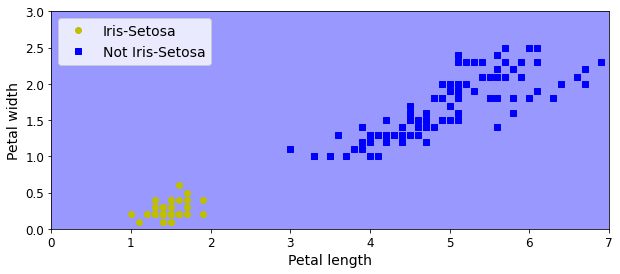

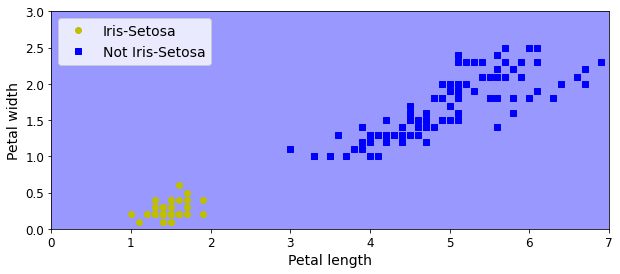

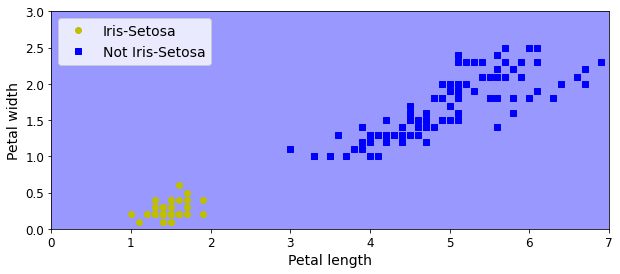

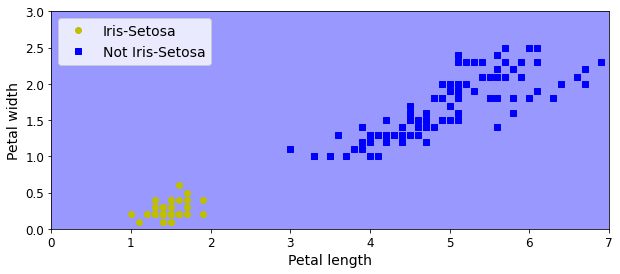

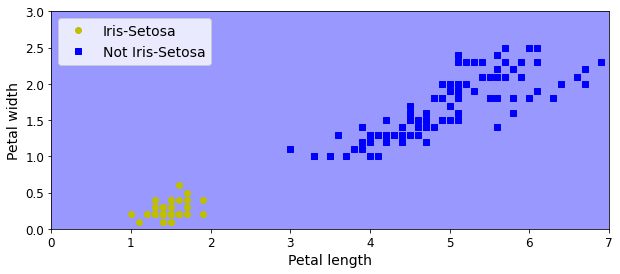

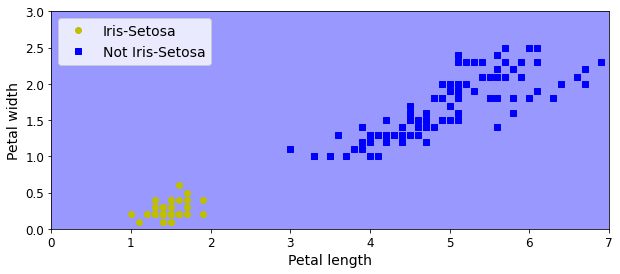

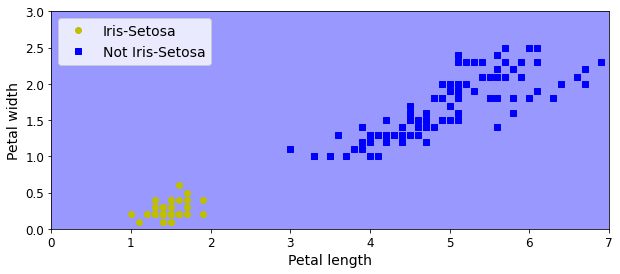

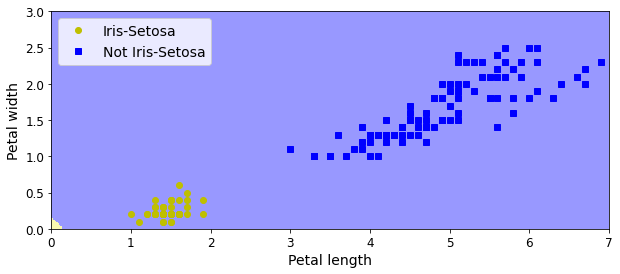

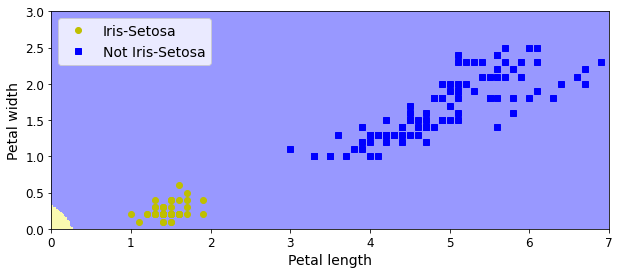

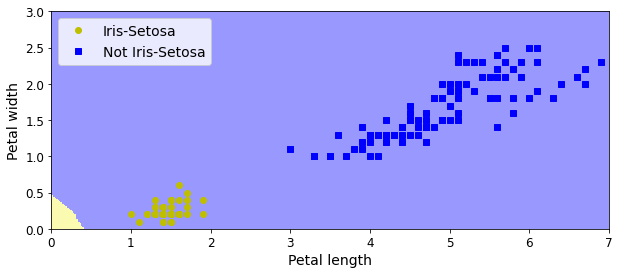

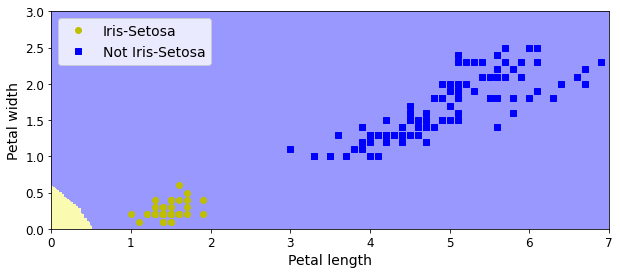

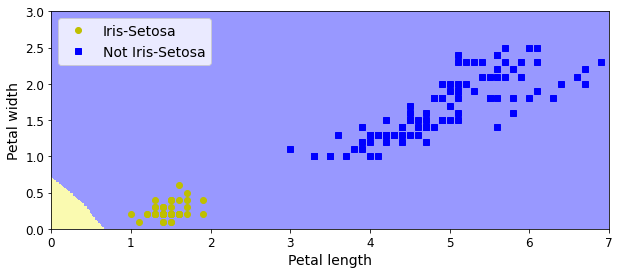

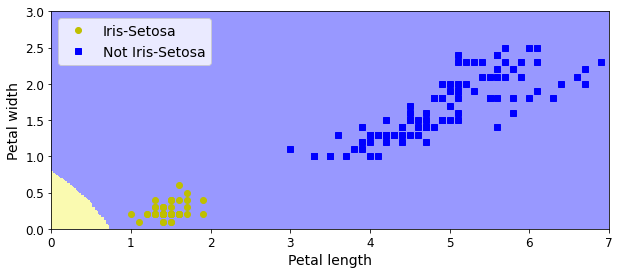

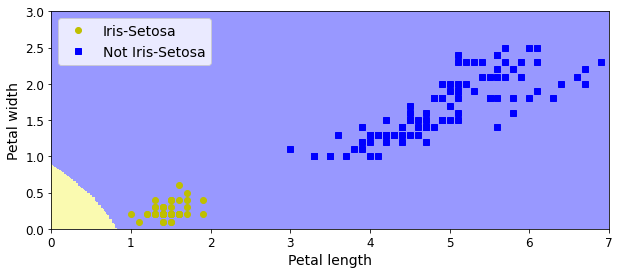

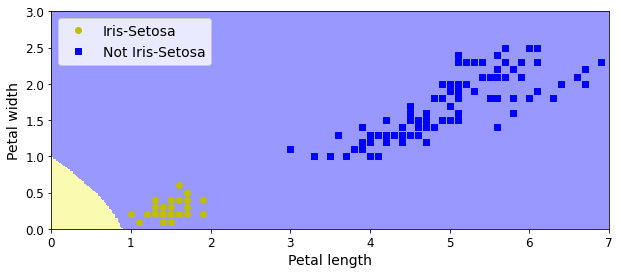

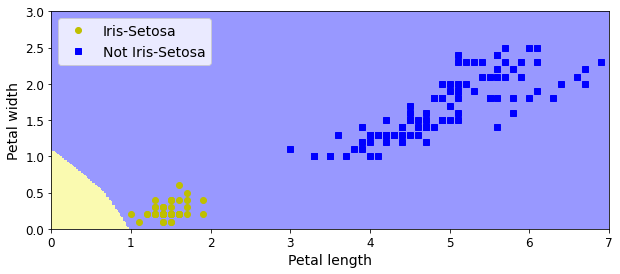

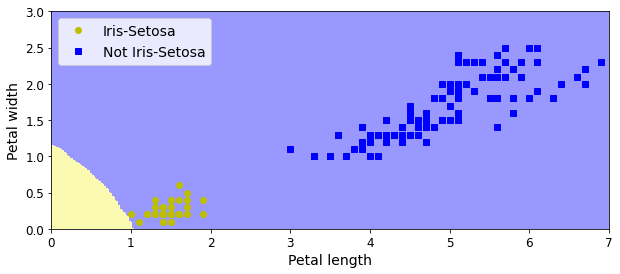

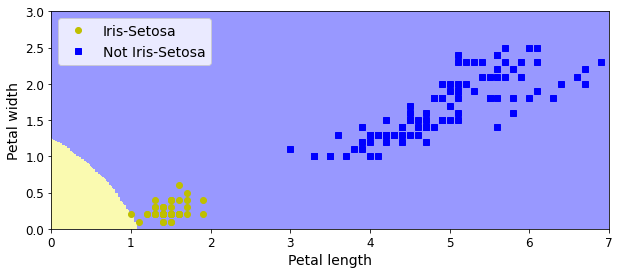

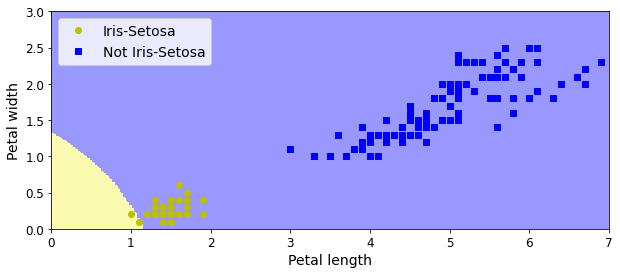

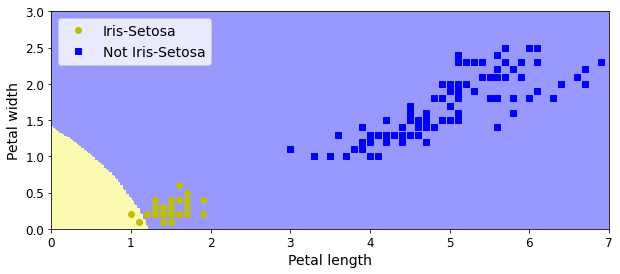

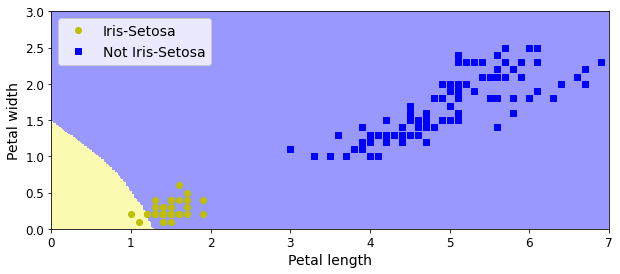

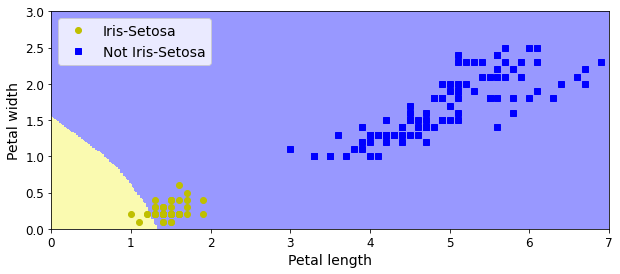

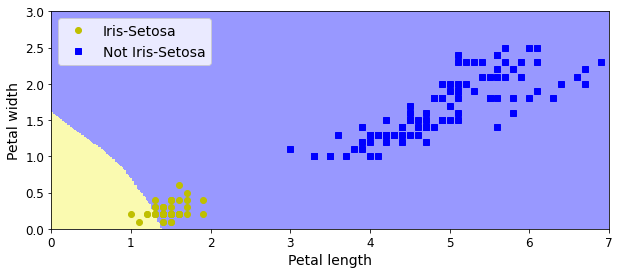

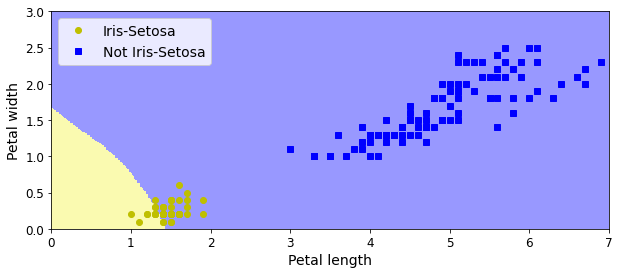

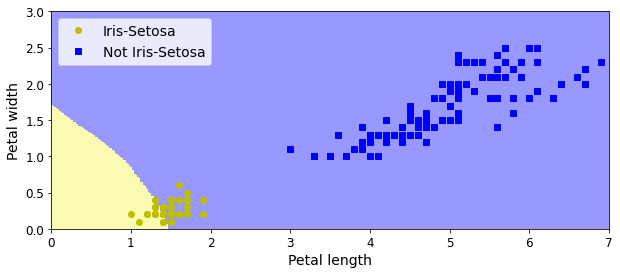

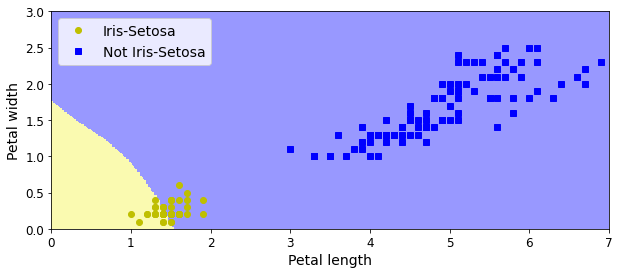

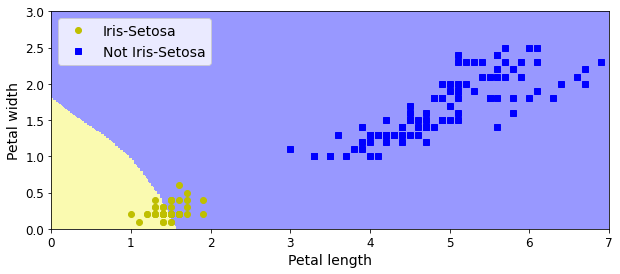

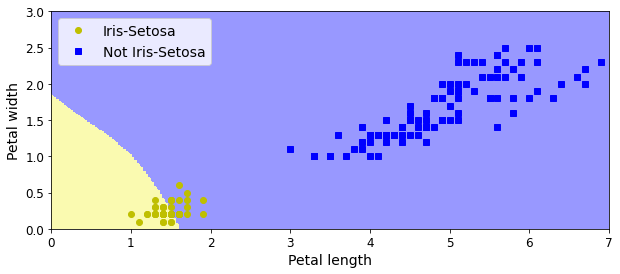

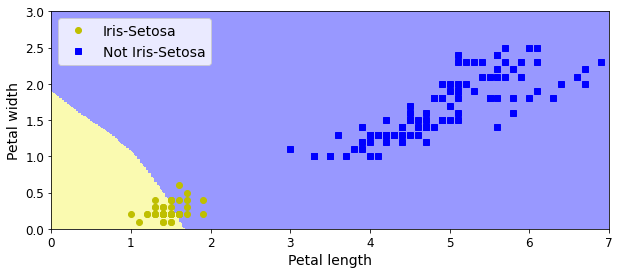

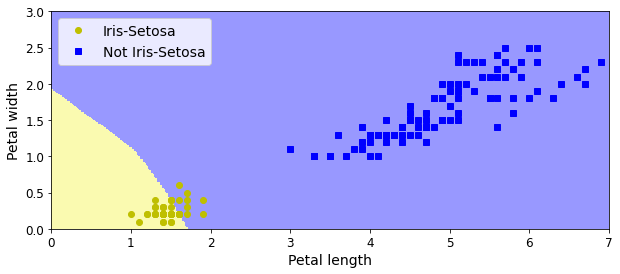

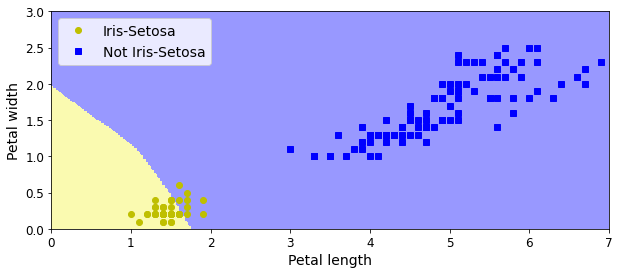

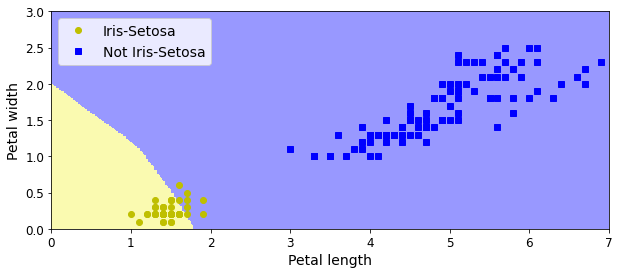

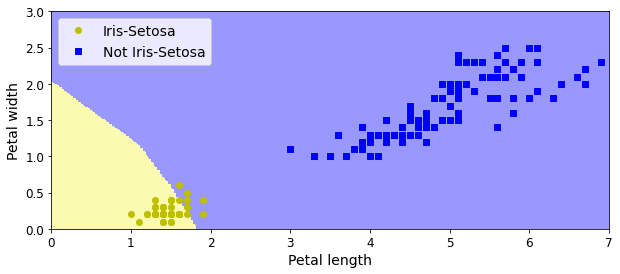

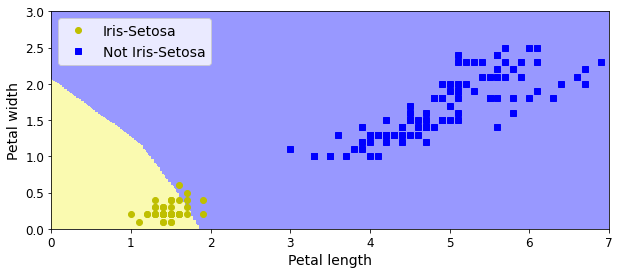

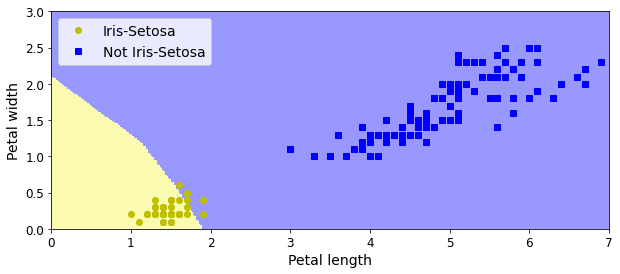

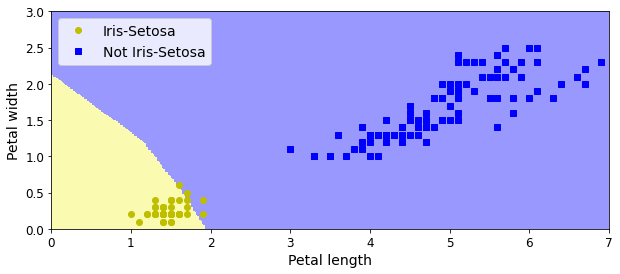

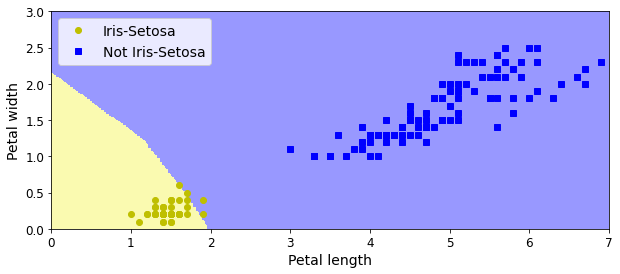

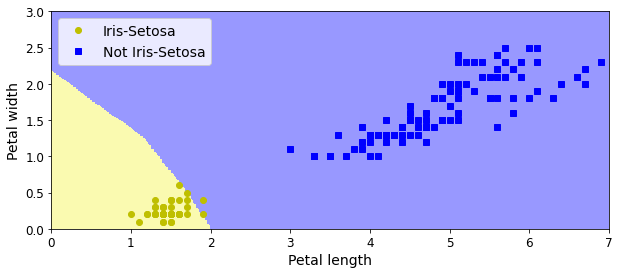

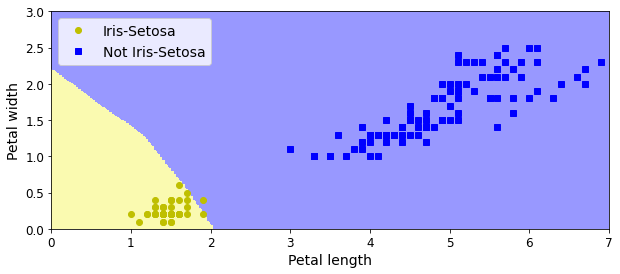

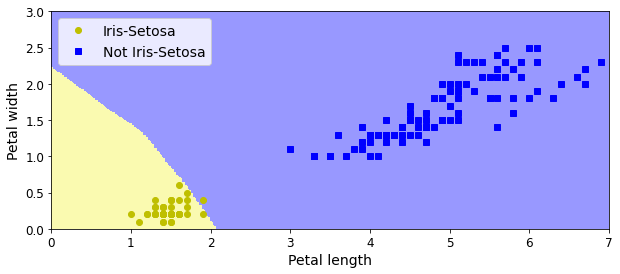

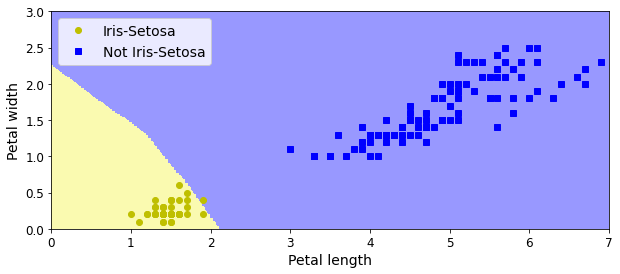

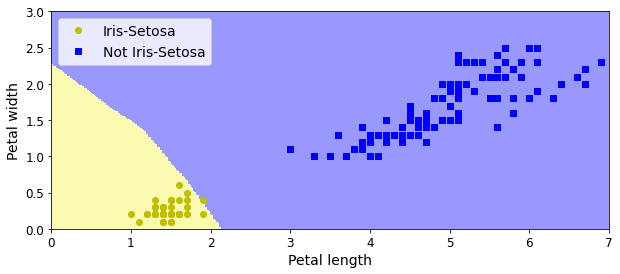

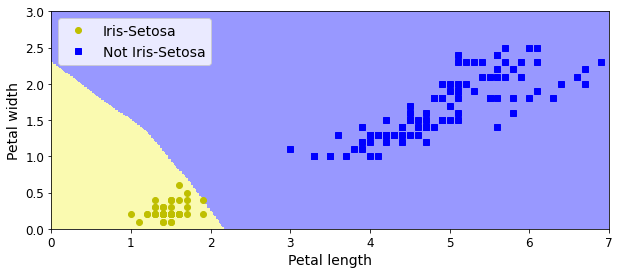

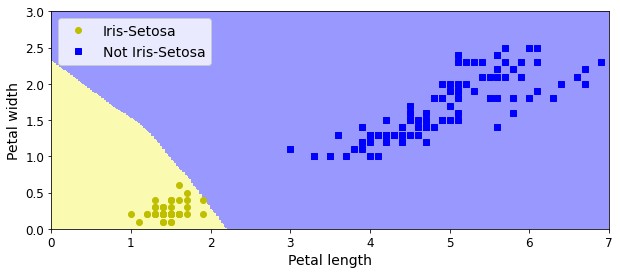

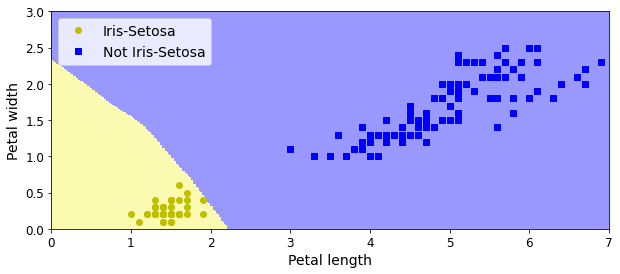

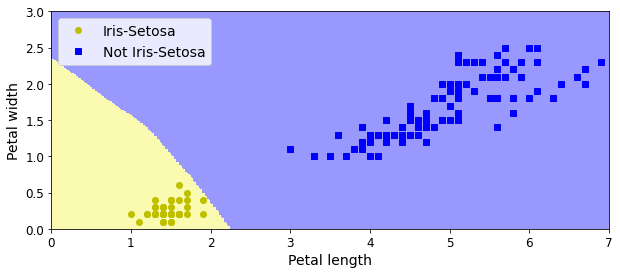

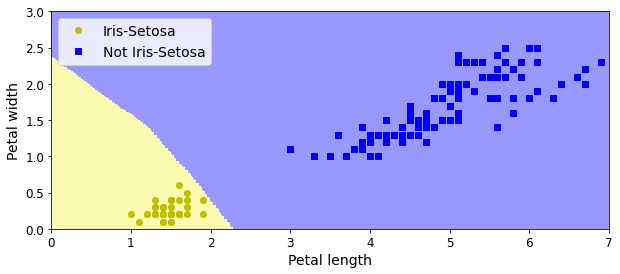

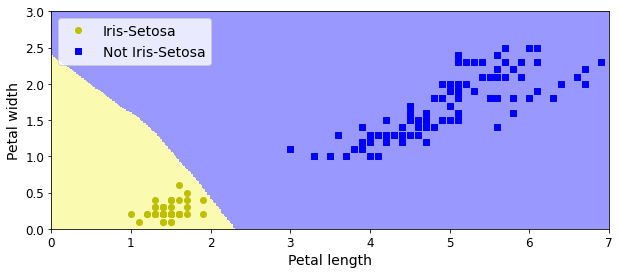

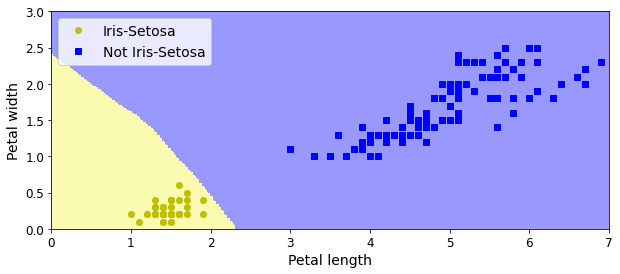

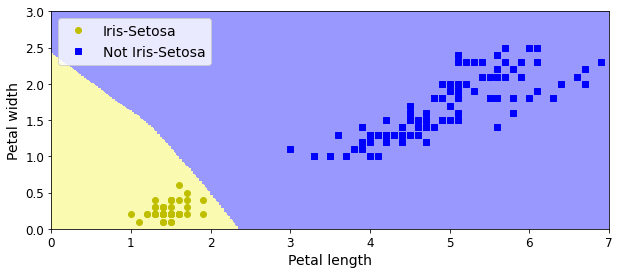

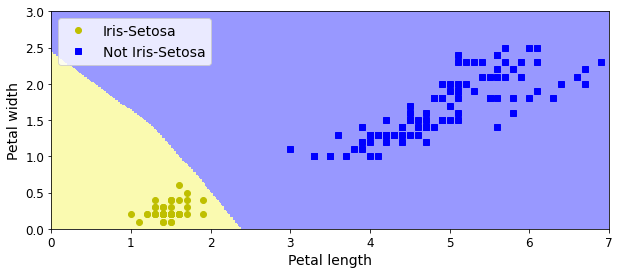

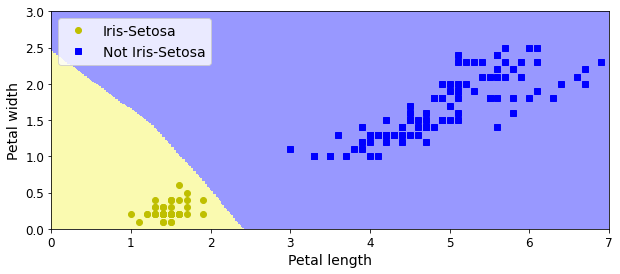

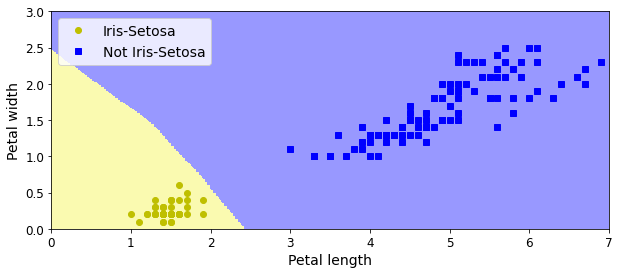

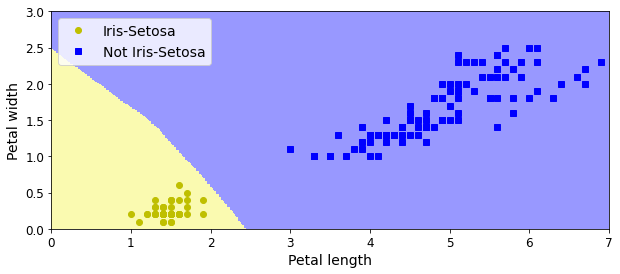

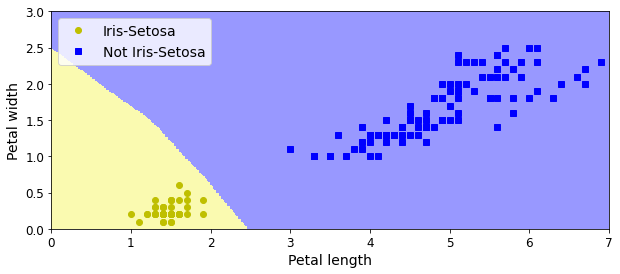

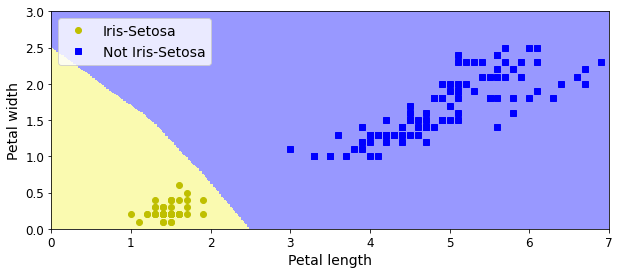

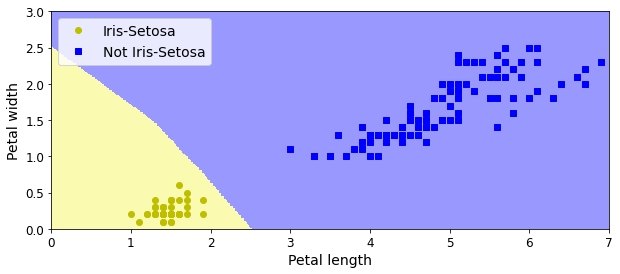

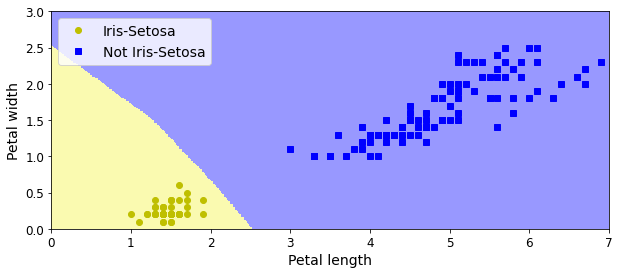

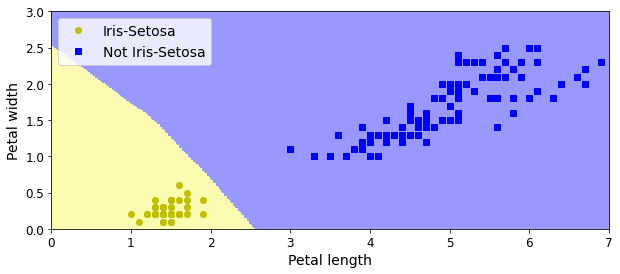

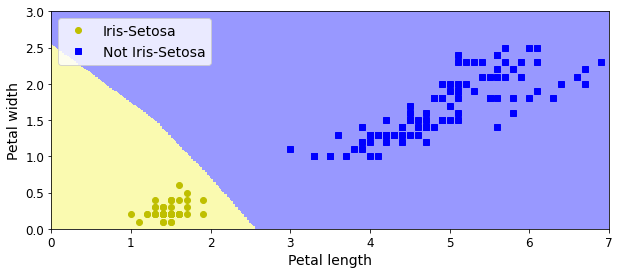

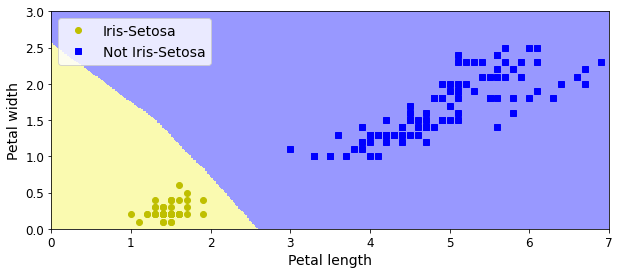

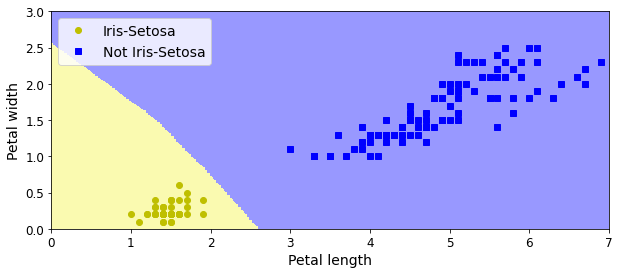

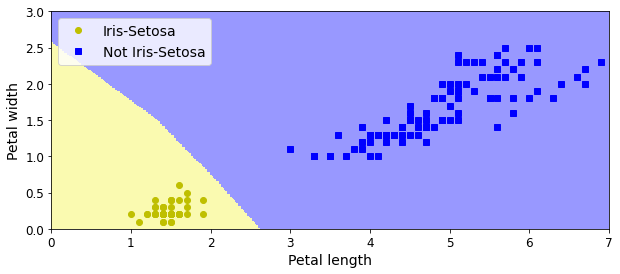

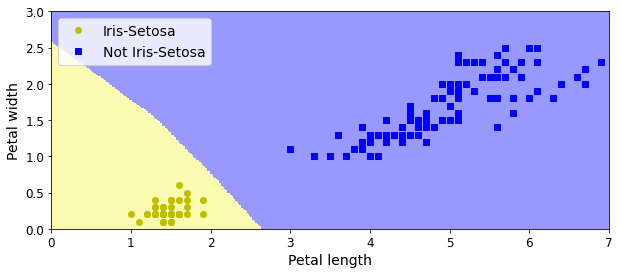

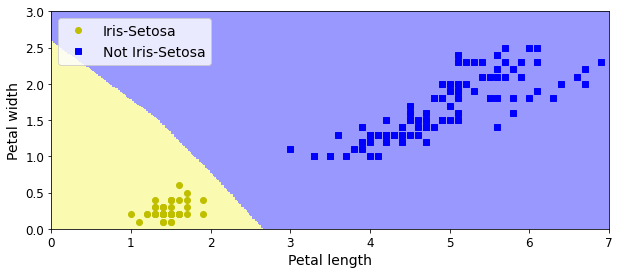

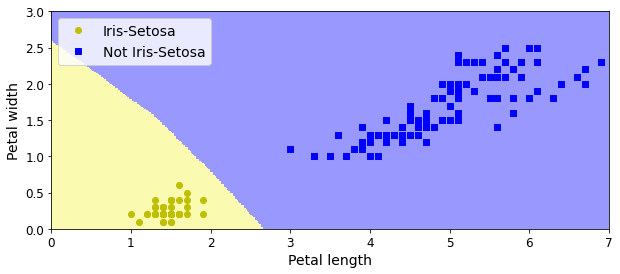

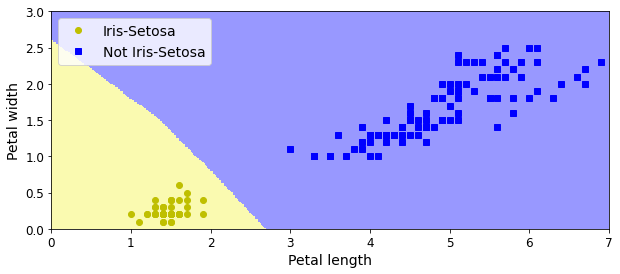

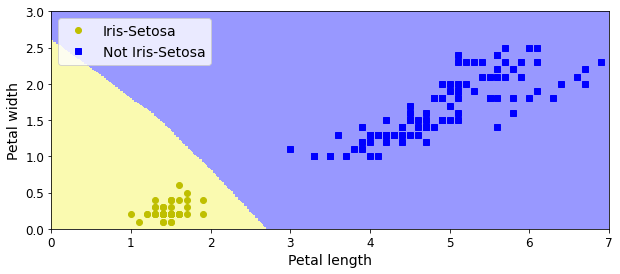

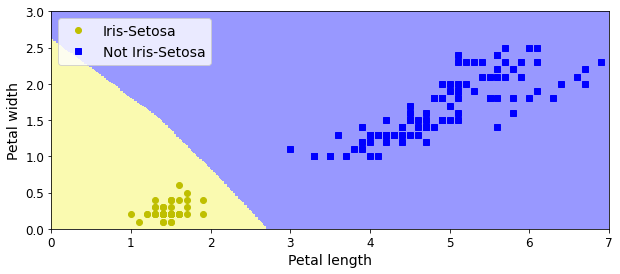

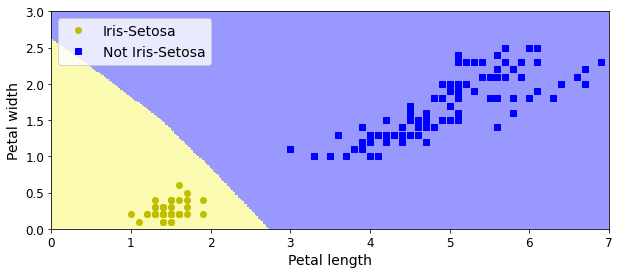

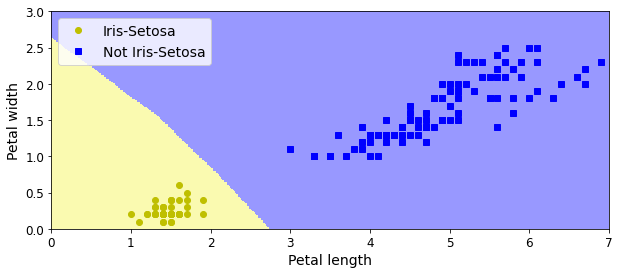

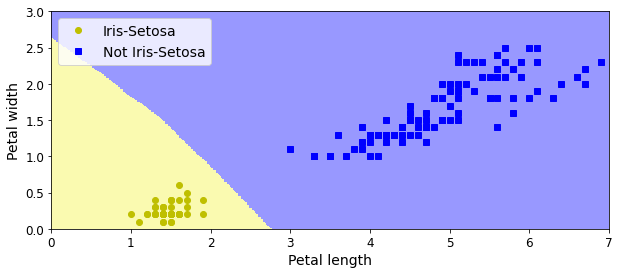

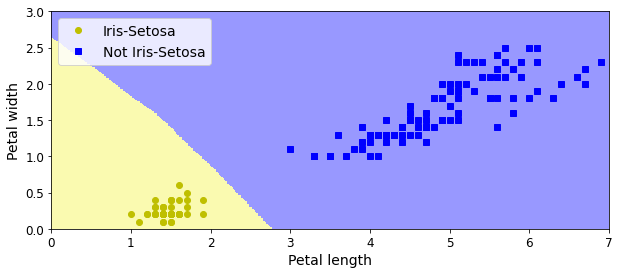

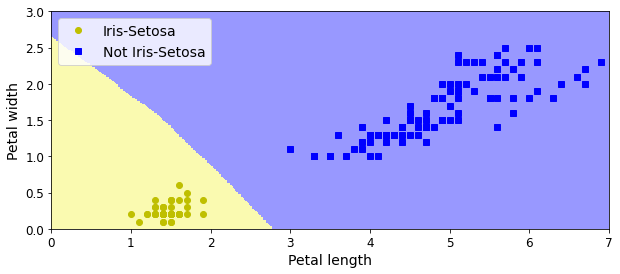

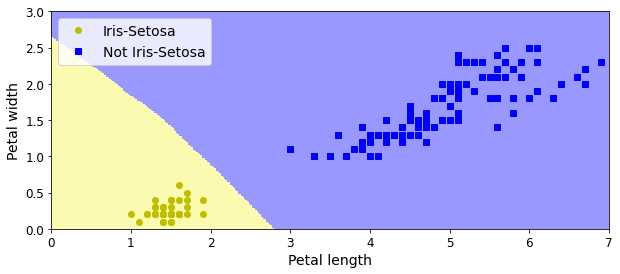

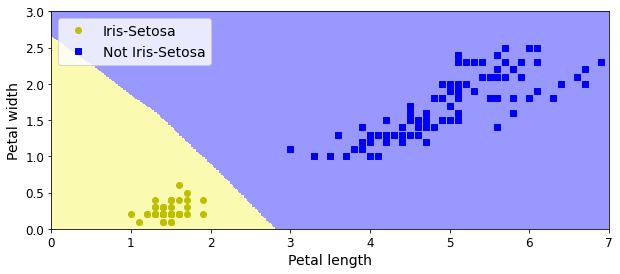

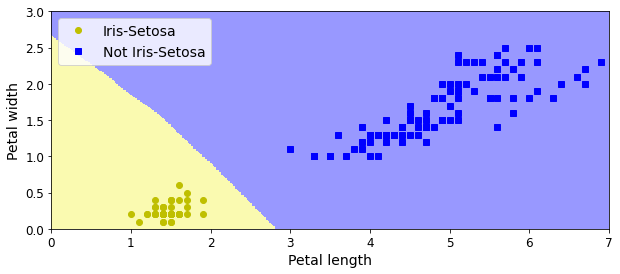

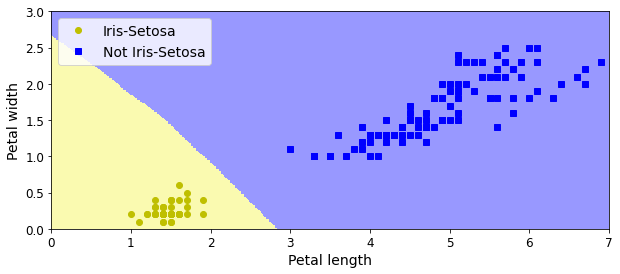

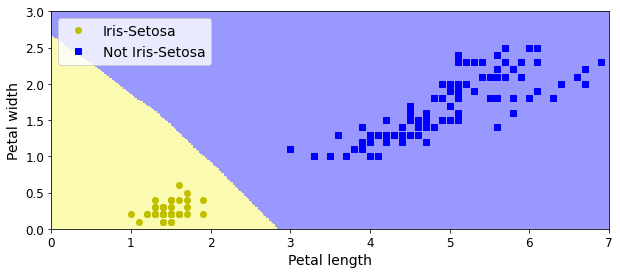

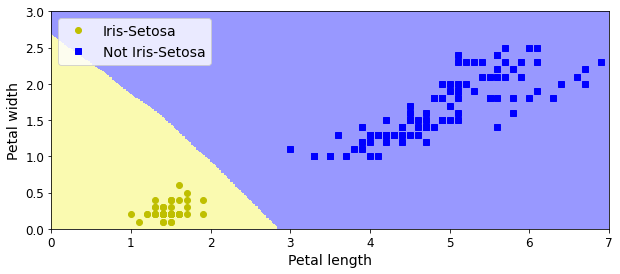

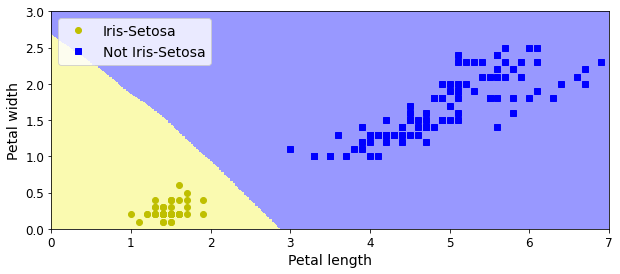

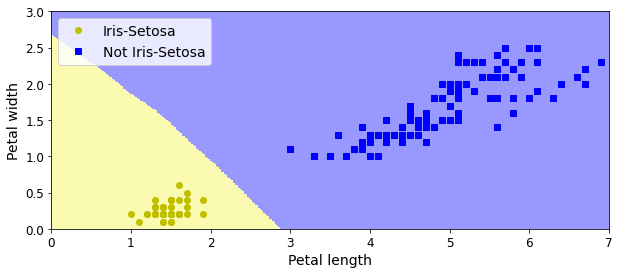

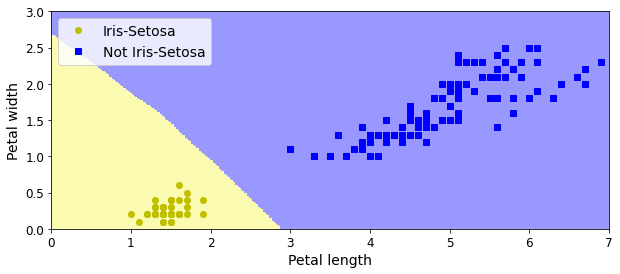

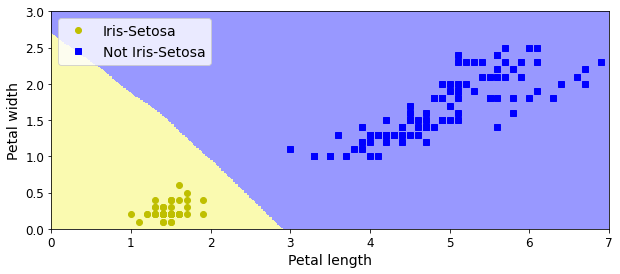

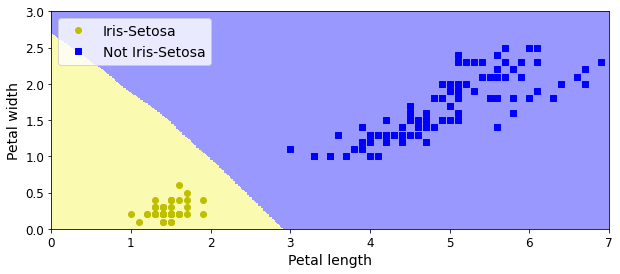

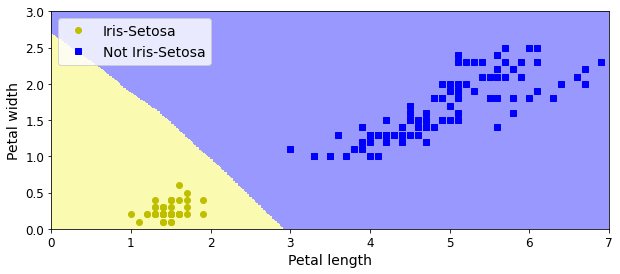

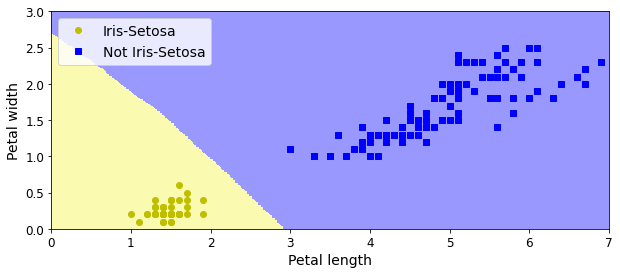

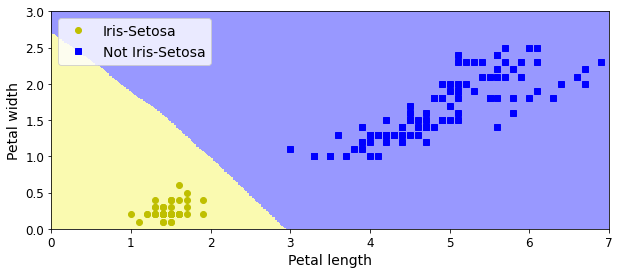

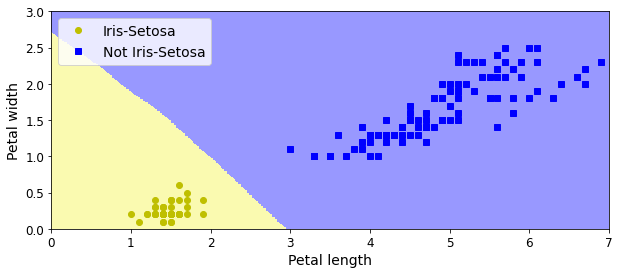

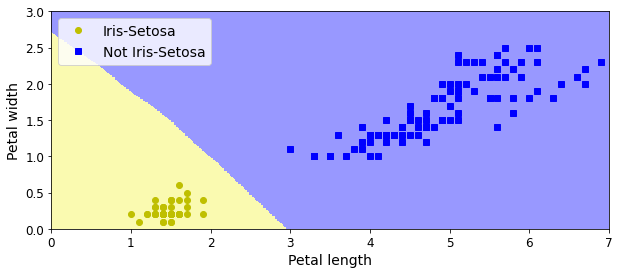

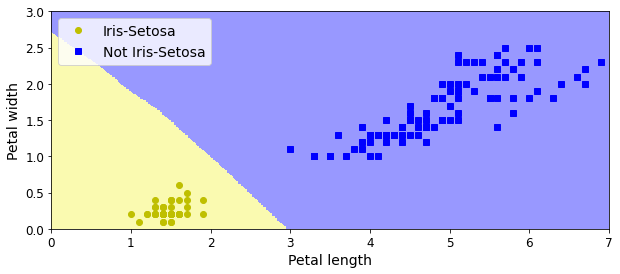

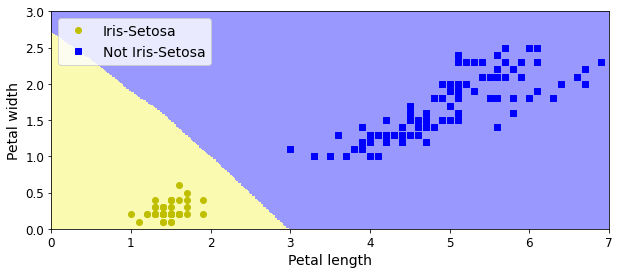

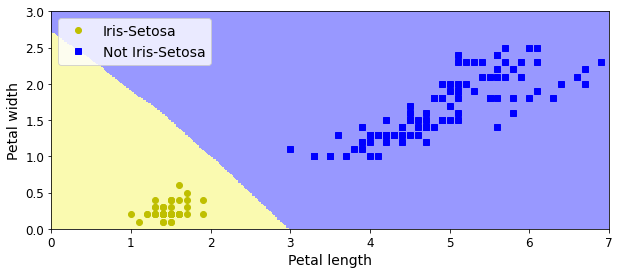

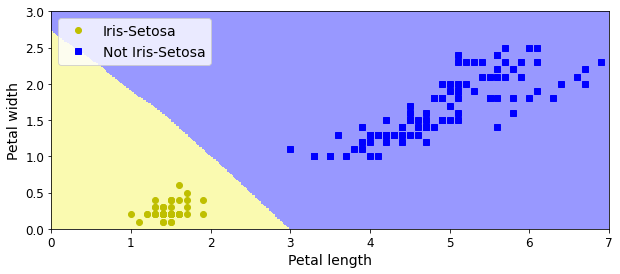

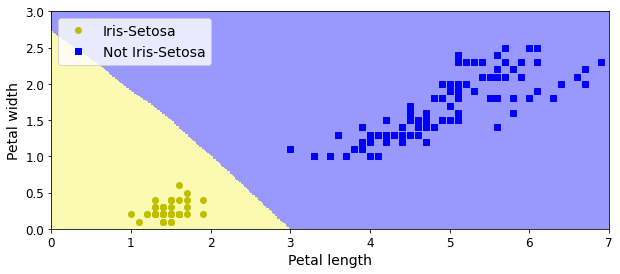

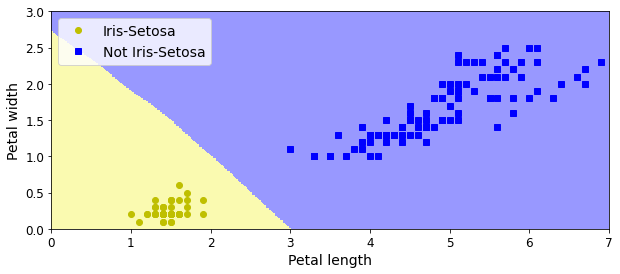

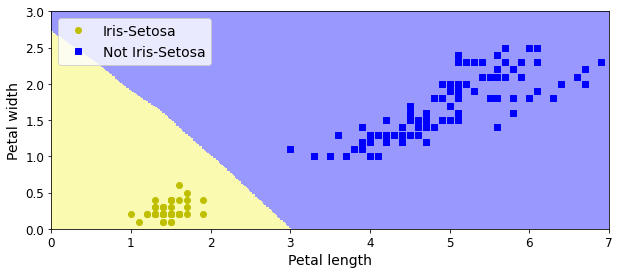

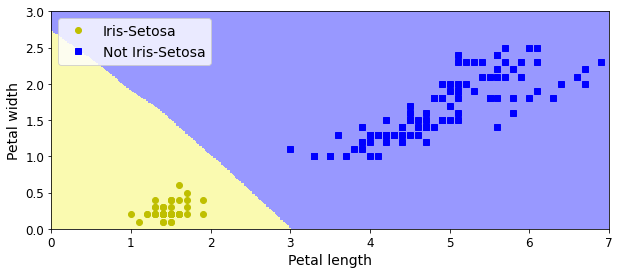

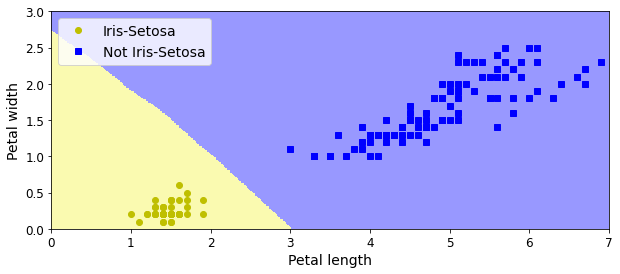

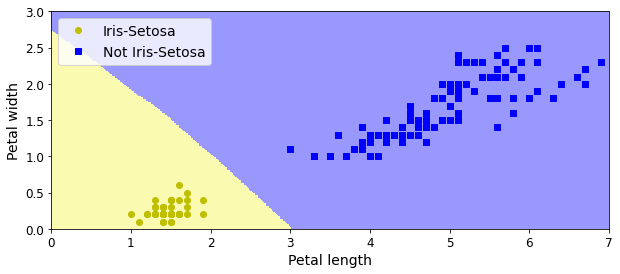

In [47]:
# Pre-define the axes for plotting
axes = [0, 7, 0, 3]

# Pre-generate a grid of sampling points
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 200).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# Now, show the change after fitting epoch by epoch
for epochs in range(0,100):
    
    # Fit the model
    mlp.fit(X, y)
    
    # Plot the dataset
    plt.figure(figsize=(10, 4))
    plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
    plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
    
    # Use to model to sampling predictions over all feature space
    y_predict = mlp.predict(np.c_[x0.ravel(), x1.ravel()])
    zz = y_predict.reshape(x0.shape)
    
    # get a nice color
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
    
    # Use contour plot again
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis(axes)
    plt.show()

**_Exercise 3_**
1. What is the structure of this MLP? How many neurons in each layer?
2. Try different numbers of neurons in the hidden layer. Observe any difference during and after the training.
3. Try different activation functions such as logistic or hyperbolic tangent function. Observe any difference in the resulting plot.
4. Try a stochastic gradient descent optimiser, and configure the learning rate and momentum accordingly. Observe any difference during and after the training.

(_Hint_: Refer to the online documentation on <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html">http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html</a>)

## (Deeper) Neural Net for MNIST on TensorFlow

In this section, we will construct and train a _deeper_ neural network with TensorFlow to perform classification. To train a large number of neurons, we would generally need a large dataset. So we will use MNIST from now on. Though it is not a good practice, we will use the whole dataset to train our neural net (for demonstration purposes).

In [49]:
# Load and use all digits in MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
digits = np.concatenate((X_train, X_test))
labels = np.concatenate((y_train, y_test))

# Pre-processing the data
t_digits = digits.astype(np.float32).reshape(-1, 28*28) / 255.0
t_labels = labels.astype(np.int32)

Next, we will define a function to construct a layer of fully-connected neurons. This is more convenient than individually creating each neuron or perceptron.

In [65]:
n_inputs = 28*28  # Total number of pixels in each MNIST's digit
n_hidden1 = 300 # Number of neurons in 1st hidden layer
n_hidden2 = 100 # Number of neurons in 2nd hidden layer
n_outputs = 10 # Number of neurons in output layer

reset_graph() # as we defined in the beginning of this notebook

# Create TensorFlow's placeholders for t_digits and t_labels
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

# Define a function to create a layer of fully-connected neurons
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[5])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

We then use this function to generate a layer of neurons that connect to either the input or the previous layer.

In [66]:
# Construct MLP with two layers
# hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
# hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
# logits = neuron_layer(hidden2, n_outputs, name="outputs")

# Or decomment below to use TensorFlow's premade instead of our function
hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

/var/folders/5s/ph73x81x4cl5c6f4k6k6t_th0000gn/T/ipykernel_90938/2416149037.py:7: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
/var/folders/5s/ph73x81x4cl5c6f4k6k6t_th0000gn/T/ipykernel_90938/2416149037.py:8: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
/var/folders/5s/ph73x81x4cl5c6f4k6k6t_th0000gn/T/ipykernel_90938/2416149037.py:9: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  logits = tf.layers.dense(hidden2, n_outputs, name="outputs")


To train this network, we need to define a loss function and choose an optimiser. After everything is constructed in TensorFlow, we run a session to execute it as usual. The code below also demonstrates how to save and restore the trained model for later use.

In [67]:
# Use mean softmax cross entropy as a loss function
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")

# Use gradient descent to train MLP
training_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# Define accuracy measure
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Initilise and run TensorFlow's computation graph of MLP
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(50):
        sess.run(training_op, feed_dict={X: t_digits, y: t_labels})
        acc_batch = accuracy.eval(feed_dict={X: t_digits, y: t_labels})
        print(epoch, "Accuracy:", acc_batch)
    
    # save the trained model
    save_path = tf.train.Saver().save(sess, "./trained_mnist_ann.ckpt")

0 Accuracy: 0.13125715
1 Accuracy: 0.1964
2 Accuracy: 0.27595714
3 Accuracy: 0.3563857
4 Accuracy: 0.42822856
5 Accuracy: 0.48944286
6 Accuracy: 0.5418714
7 Accuracy: 0.5858
8 Accuracy: 0.62285715
9 Accuracy: 0.6545143
10 Accuracy: 0.67954284
11 Accuracy: 0.7005857
12 Accuracy: 0.71842855
13 Accuracy: 0.7328857
14 Accuracy: 0.74462855
15 Accuracy: 0.7552286
16 Accuracy: 0.76514286
17 Accuracy: 0.77382857
18 Accuracy: 0.7808143
19 Accuracy: 0.78745717
20 Accuracy: 0.79355717
21 Accuracy: 0.7992
22 Accuracy: 0.80518574
23 Accuracy: 0.8102857
24 Accuracy: 0.8154857
25 Accuracy: 0.8192857
26 Accuracy: 0.82292855
27 Accuracy: 0.8265714
28 Accuracy: 0.8301
29 Accuracy: 0.8332
30 Accuracy: 0.8359
31 Accuracy: 0.8388857
32 Accuracy: 0.8411
33 Accuracy: 0.8435429
34 Accuracy: 0.8460429
35 Accuracy: 0.84835714
36 Accuracy: 0.8503
37 Accuracy: 0.85245717
38 Accuracy: 0.85422856
39 Accuracy: 0.8558
40 Accuracy: 0.8576428
41 Accuracy: 0.8597286
42 Accuracy: 0.8614857
43 Accuracy: 0.8633
44 Accuracy

INFO:tensorflow:Restoring parameters from ./trained_mnist_ann.ckpt
Predicted class:  [6]
Actual class:  6


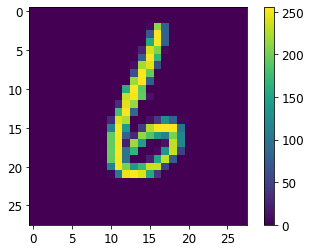

In [68]:
# random one digit
rnd_id = np.random.randint(0, len(digits))

# show the digit
plt.figure()
plt.imshow(digits[rnd_id])
plt.colorbar()
plt.grid(False)

# load the trained model and use to predict
with tf.Session() as sess:
    tf.train.Saver().restore(sess, "./trained_mnist_ann.ckpt")
    Z = logits.eval(feed_dict={X: t_digits[rnd_id].reshape(1, 28*28)})
    y_pred = np.argmax(Z, axis=1)
print("Predicted class: ", y_pred)
print("Actual class: ", labels[rnd_id])

Rerun the cell above multiple times to see how accurate our trained model is. You should be able to see that the resulted accuracy is very low and our training is slightly time-consuming.

**_Exercise 4_**
Modify and tune the neural net such that the training time is reduced but the accuracy is still acceptably high. You should try the following:
- Change the structure of the network by adding/removing a hidden layer or increasing/reducing number of neurons.
- Change the activation function of the hidden layers.
- Choose different optimisation algorithms such as tf.train.MomentumIptimizer(), tf.train.RMSPropOptimizer, and tf.train.AdamOptimizer(). Don't forget to change the training parameters accordingly.

Do you observe any effect on the accuracy during the tuning? What is the best model that you can achieve?

## Convolutional Neural Network (CNN) with TensorFlow

We now move on to convolutional neural net (CNN). The idea behind this architecture originated from a study on the animal visual cortex.

In [73]:
# Load and use all digits in MNIST if you have directly jumped to this section
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
digits = np.concatenate((X_train, X_test))
labels = np.concatenate((y_train, y_test))

# Pre-processing the data
t_digits = digits.astype(np.float32).reshape(-1, 28*28) / 255.0
t_labels = labels.astype(np.int32)

# MNIST's specification
height = 28
width = 28
channels = 1

As usual, we begin with creating TensorFlow computation graph, a loss function, and an optimiser for training the CNN.

In [85]:
reset_graph() # as we defined in the beginning of this notebook

# Create TensorFlow's placeholders for digits and labels
X = tf.placeholder(tf.float32, shape=[None, height * width], name="X")
X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
y = tf.placeholder(tf.int32, shape=[None], name="y")

# Construct 2D convolutional layers
conv1 = tf.layers.conv2d(X_reshaped, filters=10, kernel_size=3, strides=1, 
                         padding="SAME", activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=20, kernel_size=3, strides=2, 
                         padding="SAME", activation=tf.nn.relu, name="conv2")

# Create a max pooling layer
pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
pool3_flat = tf.reshape(pool3, shape=[-1, 40 * 7 * 7])

# Followed by layer of fully-connected neurons
fc1 = tf.layers.dense(pool3_flat, 50, activation=tf.nn.relu, name="fc1")
logits = tf.layers.dense(fc1, 10, name="output")

# Use mean softmax cross entropy as a loss function
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(xentropy)

# Use Adam Optimiser to train CNN 
training_op = tf.train.AdamOptimizer().minimize(loss, 
                                                aggregation_method=tf.AggregationMethod.EXPERIMENTAL_ACCUMULATE_N)
# (Change the aggregation_method to tf.AggregationMethod.EXPERIMENTAL_TREE or DEFAULT if it doesn't work)

# Define accuracy measure
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

/var/folders/5s/ph73x81x4cl5c6f4k6k6t_th0000gn/T/ipykernel_90938/1844812379.py:9: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv1 = tf.layers.conv2d(X_reshaped, filters=10, kernel_size=3, strides=2,
/var/folders/5s/ph73x81x4cl5c6f4k6k6t_th0000gn/T/ipykernel_90938/1844812379.py:11: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  conv2 = tf.layers.conv2d(conv1, filters=20, kernel_size=3, strides=4,
/var/folders/5s/ph73x81x4cl5c6f4k6k6t_th0000gn/T/ipykernel_90938/1844812379.py:19: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  fc1 = tf.layers.dense(pool3_flat, 40, activation=tf.nn.relu, name="fc1")
/var/folders/5s/ph73x81x4cl5c6f4k6k6t_th0000gn/T/ipykernel_90938/1844812379.py:20: UserWarning: `tf.layers.dense` is deprecated and wi

Then, we proceed to executing the TensorFlow computation graph, which will train our CNN.

<font color="red">**_Note that training a CNN is generally time- and memory-consuming. It is very likely that your PC will either be slow down or frozen. If this is the case, click the stop button above, wait for a couple of minutes, restart your Python kernel, and jump down to the exercise below._**</font>

In [86]:
# Define a function to make training batches
# This is useful when your PC doesn't have much memory
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

# Train the CNN batch by batch
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(10):
        for X_batch, y_batch in shuffle_batch(t_digits, t_labels, 50): 
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: t_digits, y: t_labels})
        print(epoch, "Accuracy:", acc_batch)
    
    # save the trained model
    save_path = tf.train.Saver().save(sess, "./trained_mnist_cnn.ckpt")

InvalidArgumentError: Graph execution error:

Detected at node 'Reshape_1' defined at (most recent call last):
    File "/usr/local/Cellar/python@3.9/3.9.15/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/local/Cellar/python@3.9/3.9.15/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/usr/local/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/local/Cellar/python@3.9/3.9.15/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/usr/local/Cellar/python@3.9/3.9.15/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/usr/local/Cellar/python@3.9/3.9.15/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/usr/local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/usr/local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/usr/local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/usr/local/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/5s/ph73x81x4cl5c6f4k6k6t_th0000gn/T/ipykernel_90938/1844812379.py", line 16, in <module>
      pool3_flat = tf.reshape(pool3, shape=[-1, 40 * 7 * 7])
Node: 'Reshape_1'
Input to reshape is a tensor with 4000 values, but the requested shape requires a multiple of 1960
	 [[{{node Reshape_1}}]]

Original stack trace for 'Reshape_1':
  File "/usr/local/Cellar/python@3.9/3.9.15/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/local/Cellar/python@3.9/3.9.15/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
    app.start()
  File "/usr/local/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "/usr/local/Cellar/python@3.9/3.9.15/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
    self._run_once()
  File "/usr/local/Cellar/python@3.9/3.9.15/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
    handle._run()
  File "/usr/local/Cellar/python@3.9/3.9.15/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
    await self.process_one()
  File "/usr/local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
    await dispatch(*args)
  File "/usr/local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
    await result
  File "/usr/local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
    reply_content = await reply_content
  File "/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
    res = shell.run_cell(
  File "/usr/local/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
    return super().run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
    result = self._run_cell(
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
    if await self.run_code(code, result, async_=asy):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5s/ph73x81x4cl5c6f4k6k6t_th0000gn/T/ipykernel_90938/1844812379.py", line 16, in <module>
    pool3_flat = tf.reshape(pool3, shape=[-1, 40 * 7 * 7])
  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py", line 1176, in op_dispatch_handler
    return dispatch_target(*args, **kwargs)
  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/ops/array_ops.py", line 199, in reshape
    result = gen_array_ops.reshape(tensor, shape, name)
  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/ops/gen_array_ops.py", line 8551, in reshape
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/framework/op_def_library.py", line 797, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/framework/ops.py", line 3800, in _create_op_internal
    ret = Operation(


INFO:tensorflow:Restoring parameters from ./trained_mnist_cnn.ckpt
Predicted class:  [4]
Actual class:  4


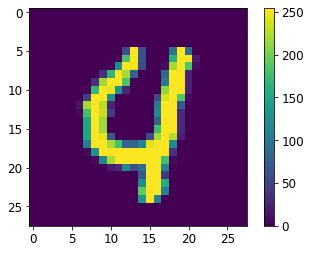

In [84]:
# random one digit for test CNN's prediction
rnd_id = np.random.randint(0, len(digits))

# visualise the digit
plt.figure()
plt.imshow(digits[rnd_id])
plt.colorbar()
plt.grid(False)

# load the trained model and use to predict
with tf.Session() as sess:
    tf.train.Saver().restore(sess, "./trained_mnist_cnn.ckpt")
    Z = logits.eval(feed_dict={X: t_digits[rnd_id].reshape(1, 28*28)})
    y_pred = np.argmax(Z, axis=1)

print("Predicted class: ", y_pred)
print("Actual class: ", labels[rnd_id])

**_Exercise 5_**
1. Visualise and/or draw on your paper this convolutional neural net to figure out its current structure.
2. Tune the model such that the accuracy is acceptably good, the required memory is low, and the training time is small.

## Overfitting

'With 4 parameters I can fit an elephant and with 5 I can make him wiggle his trunk.' John von Neumann, _cited by Enrico Fermi in Nature 427_

Do not forget that an overfitted model will not perform well in the real world. It is therefore important for you to know how to prevent this issue with neural networks in general.

**_Exercise 6_**
1. Recall the characteristic of overfitted models with respect to their performance on the training and test sets.
2. Restore this notebook back to its original state and then modify the code above to partition the MNIST dataset into training set and test set.
3. Further modify the training phase of deep net and/or CNN to use only the training set and evaluate accuracy or loss on both datasets.
4. On deep net and/or CNN for MNIST above, implement one or a combination of the regularisation techniques listed below. Observe any difference or change in performance during training:

   4.1. Early stopping, where you stop training your model if there is no further significant improvement of performance on your test set. (_Hint_: regularly check the performance on both sets and always store the best model)
   
   4.2. $l_1$ or $l_2$ regularisation, by correctly specifying TensorFlow parameters. (_Hint_: Look for 'kernel_regularizer' in the online documentation)
   
   4.3. Dropout, where each neuron has a probability of being turned off at each epoch in training phase (_Hint_: apply <a href="https://www.tensorflow.org/api_docs/python/tf/layers/dropout">tf.layers.dropout()</a> to the input layer and/or any hidden layer's output, but NOT the output of the output layer)

## Sidenote
There are many high level APIs that you can use to quickly create and deploy Machine Learning prototypes. They are very useful but it is difficult to make non-standard changes to their implementation of Machine Learning models. If you are interested, have a look on the following:
- Estimators: <a href="https://www.tensorflow.org/guide/estimators">https://www.tensorflow.org/guide/estimators</a>
- Keras: <a href="https://www.tensorflow.org/guide/keras">https://www.tensorflow.org/guide/keras</a>
- Eager execution: <a href="https://www.tensorflow.org/guide/eager">https://www.tensorflow.org/guide/eager</a>

## Reference
Aurélien Géron, _Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems_.